<a href="https://colab.research.google.com/github/gulshan2803/Python/blob/main/result_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error




In [ ]:


def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back,0])
  return numpy.array(dataX), numpy.array(dataY)



In [ ]:
numpy.random.seed(4)

dataframe = read_csv('result.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) *0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [ ]:
model = Sequential()
model.add(LSTM(2, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2/2 - 2s - loss: 0.0011 - 2s/epoch - 779ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0010 - 9ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 9.2090e-04 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 8.3891e-04 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 8.0793e-04 - 7ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 7.3367e-04 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 6.3434e-04 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 6.2270e-04 - 6ms/epoch - 3ms/step
Epoch 9/100
2/2 - 0s - loss: 5.7571e-04 - 6ms/epoch - 3ms/step
Epoch 10/100
2/2 - 0s - loss: 5.0780e-04 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 4.8011e-04 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 4.5623e-04 - 7ms/epoch - 3ms/step
Epoch 13/100
2/2 - 0s - loss: 4.5818e-04 - 6ms/epoch - 3ms/step
Epoch 14/100
2/2 - 0s - loss: 4.1673e-04 - 6ms/epoch - 3ms/step
Epoch 15/100
2/2 - 0s - loss: 4.0199e-04 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 3.8903e-04 - 5ms/epoch 

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


Train Score: 0.00 RMSE
Test Score: 1.00 RMSE


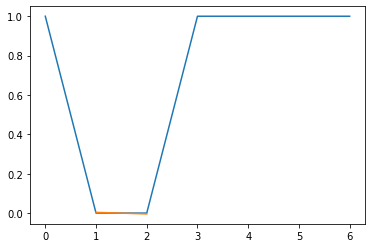

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' %(testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
print(testPredictPlot)


[[      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [0.0035065]
 [      nan]]
